# Lambda School, Intro to Data Science, Day 7 — More Regression!

## Assignment

### 1. Experiment with Nearest Neighbor parameter

Using the same 10 training data points from the lesson, train a `KNeighborsRegressor` model with `n_neighbors=1`.

Use both `carat` and `cut` features.

Calculate the mean absolute error on the training data and on the test data.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

columns = ['carat', 'cut', 'price']

train = pd.DataFrame(columns=columns, 
        data=[[0.3, 'Ideal', 422],
        [0.31, 'Ideal', 489],
        [0.42, 'Premium', 737],
        [0.5, 'Ideal', 1415],
        [0.51, 'Premium', 1177],
        [0.7, 'Fair', 1865],
        [0.73, 'Fair', 2351],
        [1.01, 'Good', 3768],
        [1.18, 'Very Good', 3965],
        [1.18, 'Ideal', 4838]])

test  = pd.DataFrame(columns=columns, 
        data=[[0.3, 'Ideal', 432],
        [0.34, 'Ideal', 687],
        [0.37, 'Premium', 1124],
        [0.4, 'Good', 720],
        [0.51, 'Ideal', 1397],
        [0.51, 'Very Good', 1284],
        [0.59, 'Ideal', 1437],
        [0.7, 'Ideal', 3419],
        [0.9, 'Premium', 3484],
        [0.9, 'Fair', 2964]])

#changing string categorical variables into ordinal ones
cut_ranks = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
train.cut = train.cut.map(cut_ranks)
test.cut = test.cut.map(cut_ranks)

In [120]:
features = ['carat', 'cut']
target = ['price']

model = KNeighborsRegressor(n_neighbors = 1)
model.fit(train[features], train[target])

'''Creating true and predicted y_vals for train and test and finding error 
between them'''
trainT = train[target]
trainP = model.predict(train[features])
trainE = mean_absolute_error(trainT, trainP)

testT = test[target]
testP = model.predict(test[features])
testE = mean_absolute_error(testT, testP)

print("Training Error:", trainE, "\nTesting Error:", testE)

Training Error: 0.0 
Testing Error: 1128.8


How does the train error and test error compare to the previous `KNeighborsRegressor` model from the lesson? (The previous model used `n_neighbors=2` and only the `carat` feature.)

Is this new model overfitting or underfitting? Why do you think this is happening here? 



The model from the lesson was much more accurate for the test. In this case the model is overfitting. It fits the training data perfectly but completely misses the test data points.
The problem is that there is too little data with too many features. Not only did we add a feature but we also took away a neighbor, and 10 data points imply isn't enough to get an accurate model. 
In addition, the the more features (dimensions) you add, the more distance there is between each set of points. This adds to the error of the model and again without more data, its harder to make accurate predictions.

[Curse of Dimensionality](https://towardsdatascience.com/curse-of-dimensionality-2092410f3d27)


### 2. More data, two features, linear regression

Use the following code to load data for diamonds under $5,000, and split the data into train and test sets. The training data has almost 30,000 rows, and the test data has almost 10,000 rows.

In [121]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = sns.load_dataset('diamonds')
df = df[df.price < 5000]

#splits data into train and test (75%/25% by default)
train, test = train_test_split(df.copy(), random_state=0)

print(train.shape, test.shape)

df.head()

(29409, 10) (9804, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Then, train a Linear Regression model with the `carat` and `cut` features. Calculate the mean absolute error on the training data and on the test data.

In [122]:
#creating numerical values for cut
cut_ranks = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
train.cut = train.cut.map(cut_ranks)
test.cut = test.cut.map(cut_ranks)

features = ['carat', 'cut']
target = ['price']

model = LinearRegression()
model.fit(train[features], train[target])

'''Creating true and predicted y_vals for train and test and finding error 
between them'''
trainT = train[target]
trainP = model.predict(train[features])
trainE = mean_absolute_error(trainT, trainP)

testT = test[target]
testP = model.predict(test[features])
testE = mean_absolute_error(testT, testP)

print("Training Error:", trainE, "\nTesting Error:", testE)

Training Error: 309.46586653861294 
Testing Error: 309.5202765379711


Use this model to predict the price of a half carat diamond with "very good" cut

In [123]:
print("Predicted Price:", model.predict([[.5, 3]]))

Predicted Price: [[1489.45526366]]


### 3. More data, more features, any model

You choose what features and model type to use! Try to get a better mean absolute error on the test set than your model from the last question.

Refer to [this documentation](https://ggplot2.tidyverse.org/reference/diamonds.html) for more explanation of the features.

Besides `cut`, there are two more ordinal features, which you'd need to encode as numbers if you want to use in your model:

In [124]:
train.describe(include=['object'])

,color,clarity
count,29409,29409
unique,7,8
top,E,SI1
freq,6090,6948


In [0]:
#creating numerical values for clarity
clarity_rank = {"IF":0,"VVS1":1, "VVS2":2,"VS1":3, "VS2":4,"SI1":5, "SI2":6, "I1":7}
train.clarity = train.clarity.map(clarity_rank)
test.clarity = test.clarity.map(clarity_rank)

#creating numerical values for color
color_rank = {"J":7, "I":6, "H":5, "G":4, "F":3, "E":2, "D":1 }
train.color = train.color.map(color_rank)
test.color = test.color.map(color_rank)

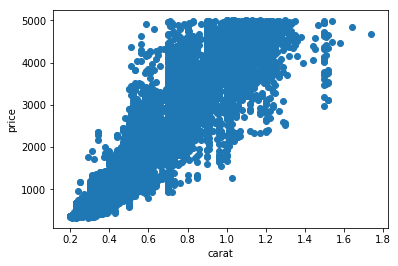

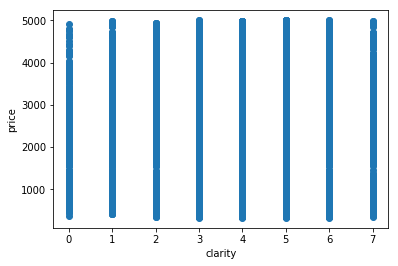

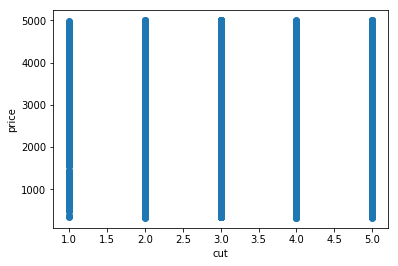

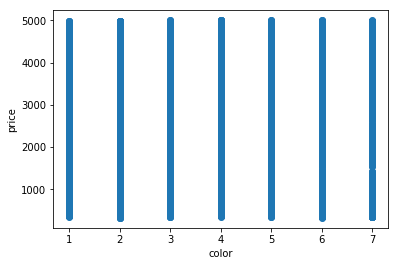

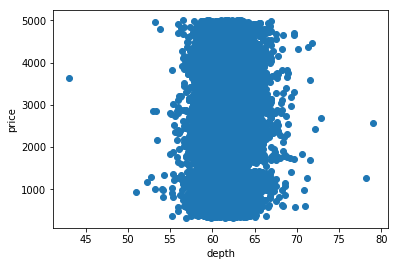

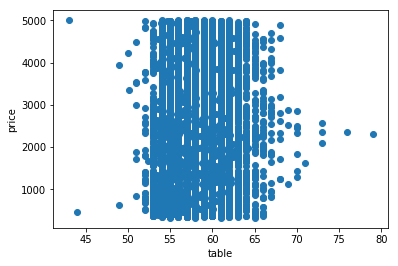

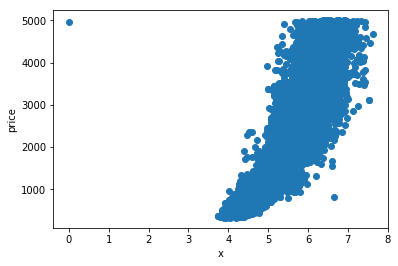

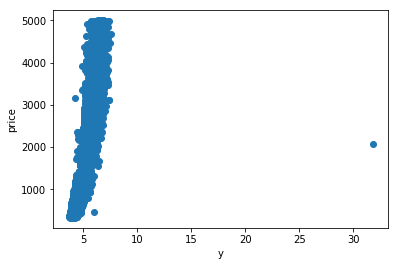

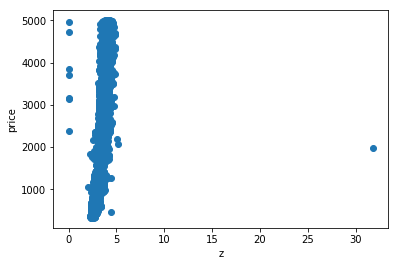

In [126]:
features = ['carat','clarity', 'cut', 'color', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

#plotting simple scatters for each x to get idea of likely relationships
for feature in features:
    plt.scatter(train[feature], train[target])
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.show()

In [127]:
features = ['carat', 'x', 'y', 'cut', 'clarity', 'color', 'table']

'''using polynomial regression because many of the relationships appear to be 
exponential'''
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model.fit(train[features],train[target])

'''Creating true and predicted y_vals for train and test and finding error 
between them'''
trainT = train[target]
trainP = model.predict(train[features])
trainE = mean_absolute_error(trainT, trainP)

testT = test[target]
testP = model.predict(test[features])
testE = mean_absolute_error(testT, testP)

print(trainE, testE)

145.78488123495413 149.58917924628975


After testing multiple models with multiple combinations of features, this appeared to be the best, with an average inaccuracy of about $150.